In [1]:
import pandas as pd
from glob import glob
import numpy as np

In [94]:
rooms = glob(r"C:\Users\sevva\Desktop\22-23\BAHAR\VeriMadenciligineGiris\sensors_dataset/*/", recursive=True)
room_names = [x.split('\\')[-2] for x in rooms]
na_vals = ['nan', 'NaN', ' ', ' missing', 'Missing', 'naN', None]     # a list containing all the values to be deemed as null values

In [96]:
liste = []
for i in range(len(room_names)):
  co2=pd.read_csv('{}co2.csv'.format(rooms[i]), na_values=na_vals, usecols=[0, 1], names=['time', 'co2'])
  co2['time'] = pd.to_datetime(co2['time'],unit='s')
  co2 = co2.set_index('time').resample('T').mean().reset_index()

  humidity=pd.read_csv('{}humidity.csv'.format(rooms[i]), na_values=na_vals, usecols=[0, 1], names=['time', 'humidity'])
  humidity['time'] = pd.to_datetime(humidity['time'],unit='s')
  humidity = humidity.set_index('time').resample('T').mean().reset_index()

  light=pd.read_csv('{}light.csv'.format(rooms[i]), na_values=na_vals, usecols=[0, 1], names=['time', 'light'])
  light['time'] = pd.to_datetime(light['time'],unit='s')
  light = light.set_index('time').resample('T').mean().reset_index()

  temperature=pd.read_csv('{}temperature.csv'.format(rooms[i]), na_values=na_vals, usecols=[0, 1], names=['time', 'temperature'])
  temperature['time'] = pd.to_datetime(temperature['time'],unit='s')
  temperature = temperature.set_index('time').resample('T').mean().reset_index()

  pir=pd.read_csv('{}pir.csv'.format(rooms[i]), na_values=na_vals, usecols=[0, 1], names=['time', 'pir'])
  pir['time'] = pd.to_datetime(pir['time'],unit='s')
  pir = pir.set_index('time').resample('T').mean().reset_index()
  pir['pir'] = np.where(pir['pir'] > 0, 1, pir['pir'])
  data = pd.merge(
      pd.merge(co2, humidity, on='time'),
      pd.merge(
          pd.merge(light, temperature, on='time'), pir, on='time'),
      on='time'
  )
  data.insert(0, "Room_name", room_names[i], True)
  data.dropna()
  liste.append(data)
df = pd.concat(liste)
df

,Room_name,time,co2,humidity,light,temperature,pir
0,417,2013-08-23 23:05:00,391.100000,51.582857,67.142857,23.477143,0.0
1,417,2013-08-23 23:06:00,383.166667,51.572500,67.833333,23.475833,0.0
2,417,2013-08-23 23:07:00,384.333333,51.582500,68.250000,23.477500,0.0
3,417,2013-08-23 23:08:00,391.666667,51.575000,68.083333,23.478333,0.0
4,417,2013-08-23 23:09:00,392.250000,51.575000,67.666667,23.481667,0.0
...,...,...,...,...,...,...,...
11235,776,2013-08-31 18:19:00,508.416667,54.220000,66.000000,24.378333,0.0
11236,776,2013-08-31 18:20:00,508.583333,54.200000,64.500000,24.387500,0.0
11237,776,2013-08-31 18:21:00,508.750000,54.177500,65.000000,24.397500,0.0
11238,776,2013-08-31 18:22:00,517.500000,54.150000,64.250000,24.405833,0.0


In [97]:
# Split the dataframe into two parts: one with the 'pir' column and another without the 'pir' column.
df2=df.dropna()
data = df2[['co2', 'humidity', 'light', 'temperature']]
label = df2['pir']

C:\Users\sevva\AppData\Local\Temp\ipykernel_7220\3507400582.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 0].set_xticklabels(df2['time'], rotation=90)
C:\Users\sevva\AppData\Local\Temp\ipykernel_7220\3507400582.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 1].set_xticklabels(df2['time'], rotation=90)
C:\Users\sevva\AppData\Local\Temp\ipykernel_7220\3507400582.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1, 0].set_xticklabels(df2['time'], rotation=90)
C:\Users\sevva\AppData\Local\Temp\ipykernel_7220\3507400582.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1, 1].set_xticklabels(df2['time'], rotation=90)


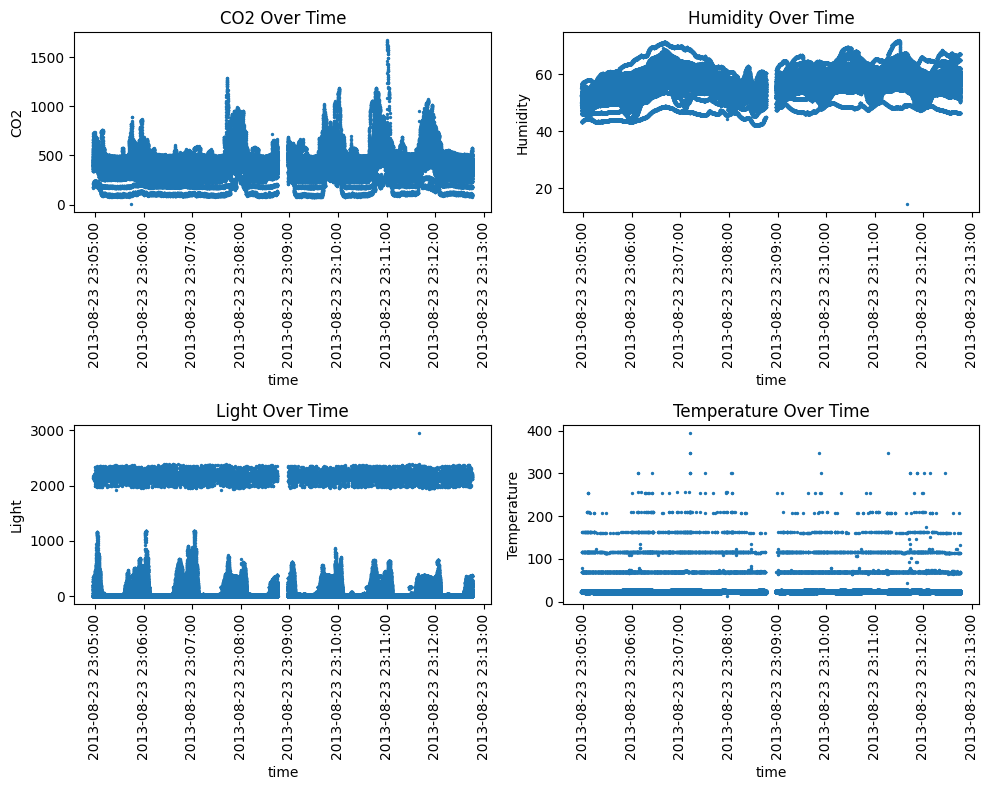

In [193]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a 2x2 grid for subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Scatter plot of 'co2'
axes[0, 0].scatter(df2['time'], df2['co2'], s=2)
axes[0, 0].set_xlabel('time')
axes[0, 0].set_ylabel('CO2')
axes[0, 0].set_title('CO2 Over Time')
axes[0, 0].set_xticklabels(df2['time'], rotation=90)

# Scatter plot of 'humidity'
axes[0, 1].scatter(df2['time'], df2['humidity'], s=2)
axes[0, 1].set_xlabel('time')
axes[0, 1].set_ylabel('Humidity')
axes[0, 1].set_title('Humidity Over Time')
axes[0, 1].set_xticklabels(df2['time'], rotation=90)

# Scatter plot of 'light'
axes[1, 0].scatter(df2['time'], df2['light'], s=2)
axes[1, 0].set_xlabel('time')
axes[1, 0].set_ylabel('Light')
axes[1, 0].set_title('Light Over Time')
axes[1, 0].set_xticklabels(df2['time'], rotation=90)

# Scatter plot of 'temperature'
axes[1, 1].scatter(df2['time'], df2['temperature'], s=2)
axes[1, 1].set_xlabel('time')
axes[1, 1].set_ylabel('Temperature')
axes[1, 1].set_title('Temperature Over Time')
axes[1, 1].set_xticklabels(df2['time'], rotation=90)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


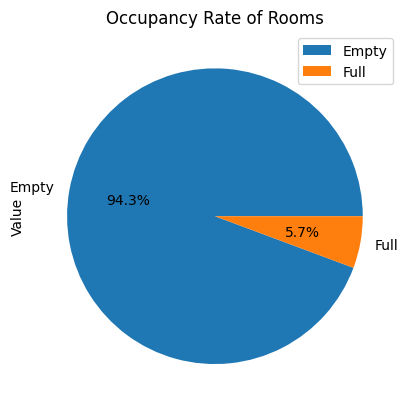

In [204]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a sample dataframe

df = pd.DataFrame(data)
count_0 = df2['pir'].value_counts()[0]
count_1 = df2['pir'].value_counts()[1]
data = {'Category': ['Empty', 'Full'],
        'Value': [count_0, count_1]}
# Create a pie chart
df.plot.pie(y='Value', labels=df['Category'], autopct='%1.1f%%')

# Set title
plt.title('Occupancy Rate of Rooms')

# Display the plot
plt.show()


In [146]:
def convert_report_to_dict(report):
    report = report.split()
    return {
        '0.0 precision':float( report[5]),
        '0.0 recall':float(report[6]),
        '0.0 f1-score':float(report[7]),
        '0.0 support':float(report[8]),
        '1.0 precision':float(report[10]),
        '1.0 recall':float(report[11]),
        '1.0 f1-score':float(report[12]),
        '1.0 support':float(report[13]),
        'accuracy f1-score':float(report[15]),
        'accuracy support':float(report[16]),
        'macro avg precision':float(report[19]),
        'macro avg recall':float(report[20]),
        'macro avg f1-score':float(report[21]),
        'macro avg support':float(report[22]),
        'weighted avg precision':float(report[25]),
        'weighted avg recall':float(report[26]),
        'weighted avg f1-score':float(report[27]), 
        'weighted av supportg':float(report[28])
        }

In [98]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

data_train, data_test, label_train, label_test = train_test_split(data, label, test_size=0.3, random_state=42)

In [99]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_train_scaled = scaler.fit_transform(data_train)
data_test_scaled = scaler.transform(data_test)
     

In [111]:
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(data_train_scaled, label_train)

KNeighborsClassifier()

In [147]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Fit KNN model
classifier.fit(data_train_scaled, label_train)

# Predict on the test data
knn_label_pred = classifier.predict(data_test_scaled)

# Compute cross-validation scores
knn_cv_scores = cross_val_score(classifier, data_train_scaled, label_train, cv=5)
knn_report = classification_report(label_test, knn_label_pred)
knn_report_dic = convert_report_to_dict(knn_report)

In [132]:
# Print mean and standard deviation of cross-validation scores
print("Cross-validation scores: {}".format(cv_scores))
print("Mean cross-validation score: {:.2f}".format(knn_cv_scores.mean()))
print("Standard deviation of cross-validation scores: {:.2f}".format(knn_cv_scores.std()))

# Print classification report
print("knn_df_reportClassification Report:\n", knn_report)

Cross-validation scores: [0.95191113 0.95205068 0.95103197 0.95209255 0.95320895]
Mean cross-validation score: 0.97
Standard deviation of cross-validation scores: 0.00
knn_df_reportClassification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99    144717
         1.0       0.84      0.72      0.78      8838

    accuracy                           0.98    153555
   macro avg       0.91      0.86      0.88    153555
weighted avg       0.97      0.98      0.98    153555



In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression()
lr.fit(data_train_scaled, label_train)

# Compute cross-validation scores
lr_cv_scores = cross_val_score(lr, data_train_scaled, label_train, cv=5)

lr_prediction = lr.predict(data_test_scaled)
lr_report = classification_report(label_test, lr_prediction)
lr_report_dic = convert_report_to_dict(lr_report)

In [135]:
from sklearn.metrics import confusion_matrix
from tabulate import tabulate

cm = confusion_matrix(label_test, lr_prediction)


cr = f"""
                        Actual_1    Actual_0 
         Predicted_1  {cm[0][0]}    {cm[0][1]}
         Predicted_0  {cm[1][0]}    {cm[1][1]}        
"""
# Split the classification report by lines
report_lines = cr.strip().split('\n')

# Split each line into columns
data = [line.split() for line in report_lines]

# Print the table
table = tabulate(data, headers='firstrow', tablefmt='fancy_grid')
print(table)

╒═════════════╤════════════╤════════════╕
│             │   Actual_1 │   Actual_0 │
╞═════════════╪════════════╪════════════╡
│ Predicted_1 │     144061 │        656 │
├─────────────┼────────────┼────────────┤
│ Predicted_0 │       6846 │       1992 │
╘═════════════╧════════════╧════════════╛


In [125]:
# Print mean and standard deviation of cross-validation scores
print("Cross-validation scores: {}".format(cv_scores))
print("Mean cross-validation score: {:.2f}".format(cv_scores.mean()))
print("Standard deviation of cross-validation scores: {:.2f}".format(cv_scores.std()))

# Print classification report

print(report)


Cross-validation scores: [0.95191113 0.95205068 0.95103197 0.95209255 0.95320895]
Mean cross-validation score: 0.95
Standard deviation of cross-validation scores: 0.00
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97    144717
         1.0       0.75      0.23      0.35      8838

    accuracy                           0.95    153555
   macro avg       0.85      0.61      0.66    153555
weighted avg       0.94      0.95      0.94    153555



In [149]:

###### Single Decision Tree CLASSIFICATION in Python #######
from sklearn import tree
from sklearn.metrics import classification_report

#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=4,criterion='entropy')
 
# Compute cross-validation scores
dt_cv_scores = cross_val_score(clf, data_train_scaled, label_train, cv=5)
 
#Creating the model on Training Data
DTree=clf.fit(data_train,label_train)
dt_prediction=DTree.predict(data_test)
dt_report = classification_report(label_test, dt_prediction)
dt_report_dic = convert_report_to_dict(dt_report)

In [137]:
# Print mean and standard deviation of cross-validation scores
print("Cross-validation scores: {}".format(cv_scores))
print("Mean cross-validation score: {:.2f}".format(cv_scores.mean()))
print("Standard deviation of cross-validation scores: {:.2f}".format(cv_scores.std()))

# Print classification report
print(dt_report)
print(dt_list_report) 

Cross-validation scores: [0.95191113 0.95205068 0.95103197 0.95209255 0.95320895]
Mean cross-validation score: 0.95
Standard deviation of cross-validation scores: 0.00
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97    144717
         1.0       0.61      0.44      0.51      8838

    accuracy                           0.95    153555
   macro avg       0.79      0.71      0.74    153555
weighted avg       0.95      0.95      0.95    153555

['precision', 'recall', 'f1-score', 'support', '0.0', '0.97', '0.98', '0.97', '144717', '1.0', '0.61', '0.44', '0.51', '8838', 'accuracy', '0.95', '153555', 'macro', 'avg', '0.79', '0.71', '0.74', '153555', 'weighted', 'avg', '0.95', '0.95', '0.95', '153555']


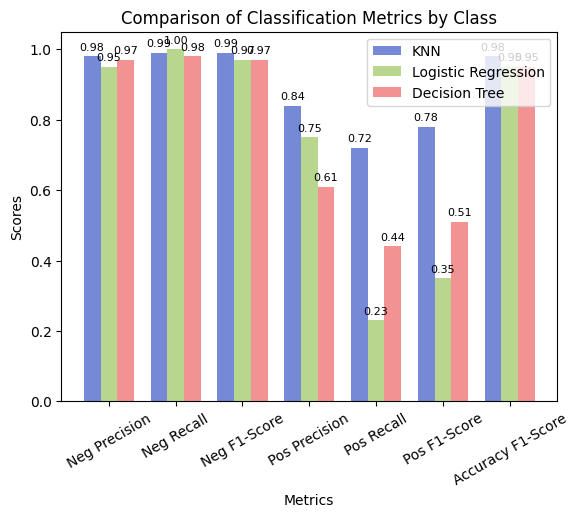

In [173]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['Neg Precision', 'Neg Recall', 'Neg F1-Score', 'Pos Precision', 'Pos Recall', 'Pos F1-Score', 'Accuracy F1-Score']

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, [knn_report_dic["0.0 precision"], knn_report_dic["0.0 recall"], knn_report_dic["0.0 f1-score"], knn_report_dic["1.0 precision"], knn_report_dic["1.0 recall"], knn_report_dic["1.0 f1-score"], knn_report_dic["accuracy f1-score"]], width, label='KNN', color=(118/255, 137/255, 214/255))
rects2 = ax.bar(x, [lr_report_dic["0.0 precision"], lr_report_dic["0.0 recall"], lr_report_dic["0.0 f1-score"], lr_report_dic["1.0 precision"], lr_report_dic["1.0 recall"], lr_report_dic["1.0 f1-score"], lr_report_dic["accuracy f1-score"]], width, label='Logistic Regression', color=(185/255, 214/255, 142/255))
rects3 = ax.bar(x + width, [dt_report_dic["0.0 precision"], dt_report_dic["0.0 recall"], dt_report_dic["0.0 f1-score"], dt_report_dic["1.0 precision"], dt_report_dic["1.0 recall"], dt_report_dic["1.0 f1-score"], dt_report_dic["accuracy f1-score"]], width, label='Decision Tree', color=(242/255, 146/255, 146/255))

ax.bar_label(rects1, padding=3, fontsize=8, fmt='%.2f')
ax.bar_label(rects2, padding=3, fontsize=8, fmt='%.2f')
ax.bar_label(rects3, padding=3, fontsize=8, fmt='%.2f')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Classification Metrics by Class')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=30)
ax.legend()
plt.show()



In [8]:
#Logistic Regression
classification_report = """
          -   precision    recall  f1-score   support

         0.0       0.97      0.98      0.97    144717
         1.0       0.61      0.44      0.51      8838
    Accuracy       -         -         0.95    153555
   Macro_Avg       0.79      0.71      0.74    153555
Weighted_Avg       0.95      0.95      0.95    153555
"""

# Split the classification report by lines
report_lines = classification_report.strip().split('\n')

# Split each line into columns
data = [line.split() for line in report_lines]

# Print the table
table = tabulate(data, headers='firstrow', tablefmt='fancy_grid')
print(table)

╒══════════════╤═════════════╤══════════╤════════════╤═══════════╕
│ -            │ precision   │ recall   │   f1-score │   support │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╡
│              │             │          │            │           │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 0.0          │ 0.97        │ 0.98     │       0.97 │    144717 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1.0          │ 0.61        │ 0.44     │       0.51 │      8838 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ Accuracy     │ -           │ -        │       0.95 │    153555 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ Macro_Avg    │ 0.79        │ 0.71     │       0.74 │    153555 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ Weighted_Avg │ 0.95        │ 0.95     │       0.95 │    153555 │
╘══════════════╧═════════════╧══════════╧════════════╧════════

In [8]:
#Logistic Regression
classification_report = """
          -   precision    recall  f1-score   support

         0.0       0.97      0.98      0.97    144717
         1.0       0.61      0.44      0.51      8838
    Accuracy       -         -         0.95    153555
   Macro_Avg       0.79      0.71      0.74    153555
Weighted_Avg       0.95      0.95      0.95    153555
"""

# Split the classification report by lines
report_lines = classification_report.strip().split('\n')

# Split each line into columns
data = [line.split() for line in report_lines]

# Print the table
table = tabulate(data, headers='firstrow', tablefmt='fancy_grid')
print(table)

╒══════════════╤═════════════╤══════════╤════════════╤═══════════╕
│ -            │ precision   │ recall   │   f1-score │   support │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╡
│              │             │          │            │           │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 0.0          │ 0.97        │ 0.98     │       0.97 │    144717 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1.0          │ 0.61        │ 0.44     │       0.51 │      8838 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ Accuracy     │ -           │ -        │       0.95 │    153555 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ Macro_Avg    │ 0.79        │ 0.71     │       0.74 │    153555 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ Weighted_Avg │ 0.95        │ 0.95     │       0.95 │    153555 │
╘══════════════╧═════════════╧══════════╧════════════╧════════